# Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the true position is $\mu = 1$ (in suitable units) and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

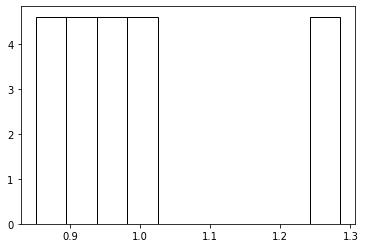

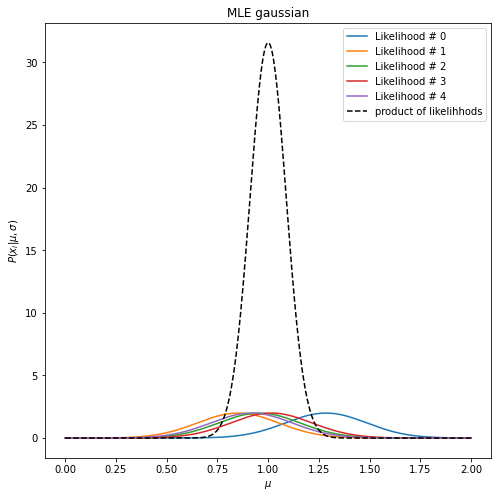

In [2]:
# Part 1

N=5 # number of measurments
sigma=0.2
mean=1.0

data = norm.rvs(loc=mean, scale=sigma, size=N) # mean=1 and error=0.2

plt.hist(data, density=True, fill=False)

x_grid=np.linspace(0,2,5000)
gaussian_Likelihoods=np.empty([len(data),5000])
                   
for j in range(len(data)):
    for k in range(1,5000,1):
        gaussian_Likelihoods[j][k]=(norm(loc=mean,scale=sigma).pdf(x_grid[k]))
        gaussian_Likelihoods[j][0]=j
    
'''gaussian_Likelihoods = np.array([norm.pdf(xgrid,loc=s,scale=sigma) for s in sample])''' # easier way to make this kind of for-cycle

product_L= np.prod(gaussian_Likelihoods, axis=0)
#print(product_L)

plt.figure(figsize=[8,8])
for i in range(N):
    plt.title('MLE gaussian')
    plt.xlabel('$\mu$')
    plt.ylabel(r'$P(x_i|\mu,\sigma)$')
    plt.plot(x_grid, norm.pdf(x_grid, loc=data[i], scale=sigma) , label='Likelihood # %1.0f' % (i) ) #
    plt.legend(loc='best')

plt.plot(x_grid, product_L,'--', label='product of likelihhods',c='black')  
plt.legend()

In [3]:
mle_solution=x_grid[np.argsort(product_L)[-1]]
mle_estimator=np.mean(data)

print('Likelihood is maximaized at %1.3f \n My estimator is the mean %1.3f ' % (mle_solution, mle_estimator))


Likelihood is maximaized at 1.000 
 My estimator is the mean 1.005 


uncertianity on the mean is = 0.089 
 fisehr matrix formula =  0.089


<ipython-input-4-a290218c457e>:1: RuntimeWarning: divide by zero encountered in log
  fisher_marix=np.diff(np.log(product_L), n=2) # 2nd oreder derivative f the log liklihood


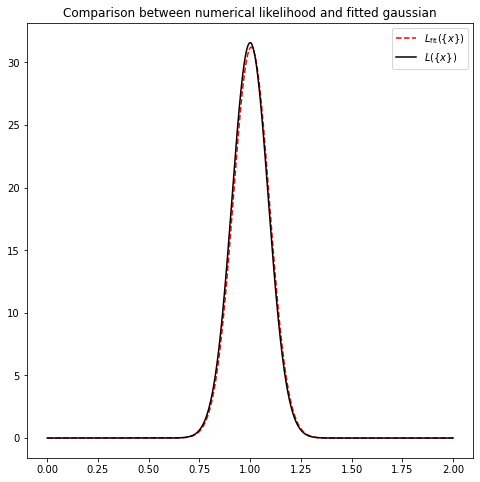

In [4]:
fisher_marix=np.diff(np.log(product_L), n=2) # 2nd oreder derivative f the log liklihood
sigma_mu=((-1*fisher_marix)/((x_grid[1]-x_grid[0])**2))**(-0.5) # d^2mu = (x_grid[1]-x_grid[0])**2
sigma_mean=sigma/np.sqrt(N)

print('uncertianity on the mean is = %1.3f \n fisehr matrix formula =  %1.3f' % (sigma_mean, sigma_mu[1]) )

C=7
plt.figure(figsize=[8,8])
plt.plot(x_grid, C*norm.pdf(x_grid, loc=mle_estimator, scale=sigma_mean),'--' ,c='red',label=r'$L_\mathrm{fit}(\{x\})$') # plot of fitted gaussian C = normalization factor
plt.plot(x_grid, product_L, label=r'$L(\{x\})$', c='black') # plot of the numerial likelihood
plt.title('Comparison between numerical likelihood and fitted gaussian')
plt.legend()



let's generat some data concatenating 5 gaussians

(array([3.69182967, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 3.69182967, 3.69182967, 7.38365933]),
 array([0.56725678, 0.62143046, 0.67560414, 0.72977782, 0.7839515 ,
        0.83812518, 0.89229886, 0.94647254, 1.00064622, 1.0548199 ,
        1.10899358]),
 <BarContainer object of 10 artists>)

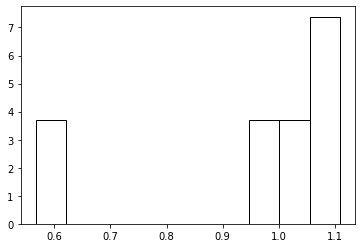

In [6]:
N=5 # number of measurments
sigma=norm.rvs(loc=0.2, scale=0.05, size=N)
mean=1.0

data = np.concatenate([norm(mean,s).rvs(1) for s in sigma]) # mean=1 and error=sigma

plt.hist(data, density=True, fill=False)

Each gaussian is the $p(x_i|model)$, the product of them is the Likelihood.
I find the maximum of the Likelihood wich correspond with the mean of the distribution.


Likelihood is maximaized at 1.007 
 My estimator is the mean 1.007 


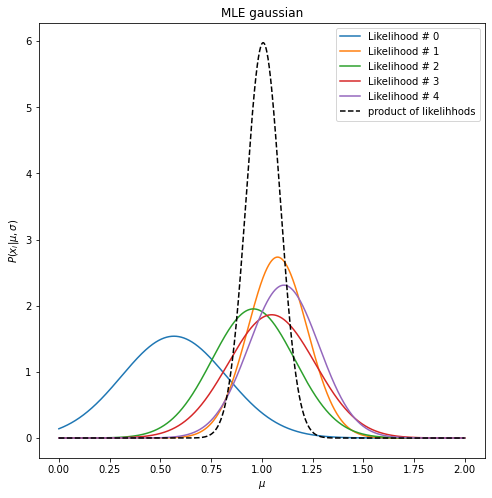

In [7]:
x_grid=np.linspace(0,2,5000)
gaussian_Likelihoods=np.empty([len(data),5000])
                   
gaussian_Likelihoods = np.array([norm.pdf(x_grid,loc=s,scale=ss) for s,ss in zip(data, sigma)])

product_L= np.prod(gaussian_Likelihoods, axis=0)
#print(product_L)

plt.figure(figsize=[8,8])
for i in range(N):
    plt.title('MLE gaussian')
    plt.xlabel('$\mu$')
    plt.ylabel(r'$P(x_i|\mu,\sigma)$')
    plt.plot(x_grid, gaussian_Likelihoods[i], label='Likelihood # %1.0f' % (i) )
    plt.legend(loc='best')

plt.plot(x_grid, product_L,'--', label='product of likelihhods',c='black')  
plt.legend()

mle_solution=x_grid[np.argsort(product_L)[-1]]
mle_estimator=np.average(data, weights=1/sigma**2)

print('Likelihood is maximaized at %1.3f \n My estimator is the mean %1.3f ' % (mle_solution, mle_estimator))


Let me compute the uncertianity on the mean estimate (maximum of the likelihood), using Fisher information matrix. And then I compare the results with a fitted gaussian standard deviation.

uncertianity on the mean is = 0.084 
 fisehr matrix formula =  0.000


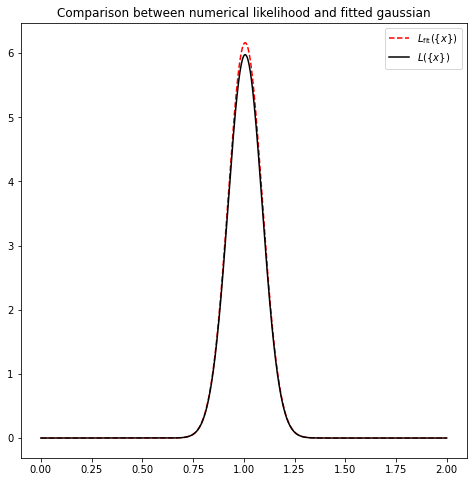

In [24]:
fisher_matrix=np.diff(np.log(product_L), n=2) # 2nd oreder derivative f the log liklihood
sigma_mu=((-1*fisher_marix)/((x_grid[1]-x_grid[0])**2))**(-0.5) # d^2mu = (x_grid[1]-x_grid[0])**2 (covariance matrix)
sigma_mean=np.sum(sigma**-2)**-0.5 #sigma/np.sqrt(N) homoscidsics, but here are heteroscidesics look a the first 3 lectures

print('uncertianity on the mean is = %1.3f \n fisehr matrix formula =  %1.3f' % (sigma_mean, sigma_mu[0]) )

C=1.3 # by hand normalization
plt.figure(figsize=[8,8])
plt.plot(x_grid, C*norm.pdf(x_grid, loc=mle_estimator, scale=sigma_mean),'--' ,c='red',label=r'$L_\mathrm{fit}(\{x\})$') # plot of fitted gaussian C = normalization factor
plt.plot(x_grid, product_L, label=r'$L(\{x\})$', c='black') # plot of the numerical likelihood
plt.title('Comparison between numerical likelihood and fitted gaussian')
plt.legend()